# CH1. EDA

**두 개 이상의 변수 탐색하기**

평균이나 분산은 한 번에 한 변수를 다루는 일변량분석(univariate analysis)이다.

상관분석은 두 변수를 비교하는 이변량분석(bivariate analysis)이다.

이번에는 셋 이상의 변수를 비교하는 다변량분석(multivariate analysis)를 다루는 방법을 살펴본다.

#####  주요 용어 정리

> 분할표(contigency table): 두 가지 이상의 범주형 변수의 빈도수를 기록한 표

> 육각형 구간(hexagonal binning): 두 변수를 육각형 모양의 구간으로 나눈 그림

> 등고 도표(contour plot): 지도상에 같은 높이의 지점을 등고선으로 나타내는 것과 같이, 두 변수의 밀도를 등고선으로 표시한 도표

> 바이올린 도표(violin plot): 상자그림과 비슷하나 바이올린의 모양으로 밀도추정을 함께 볼 수 있는 도표

##### 주요 개념 정리

> 육각형 구간이나 등고선 도표는 데이터가 많아도 양에 상관 없이 한 번에 두 수치형 변수를 시각적으로 검토하기 유용한 도구이다.

> 분할표는 두 범주형 변수의 도수를 확인하기 위한 표준 방법이다

> 박스플롯과 바이올린플롯은 범주형 변수와 수치형 변수간의 관계를 도식화하기 위한 도구이다.


일변량분석과 같이 이변량분석도 요약통계를 계산하고 시각화 하는 것을 기본으로 한다.

이변량분석이나 다변량분석의 형태는 데이터가 수치형인지 혹은 범주형인지 데이터의 특성에 따라 달라진다.

In [1]:
# 라이브러리 불러오기

%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

## 데이터 import

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

# 육각형 구간과 등고선 (numeric variates 사이의 시각화)

산점도는 데이터의 개수가 상대적으로 적을 때는 괜찮지만, 십 수만 단위가 되면 점이 밀집되어 알아보기 어렵다. 따라서 이러한 관계를 나타내는 다른 방법으로 육각형 구간이나 등고선을 활용할 수 있다.

### kc_tax: 워싱턴 주의 King County 의 주택 시설에 대한 과세 평가 금액 정보 데이터

In [5]:
# data 

kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [6]:
kc_tax.shape

(498249, 3)

In [5]:
# sp500의 sector까지 적혀있는 주식 목록

sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [7]:
# sp500 의 주식 가격

sp500_px

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [13]:
#  통신사 주식 데려오기

sp500_sym[sp500_sym['sector_label']=='Telecom']

# 정답은 sp500_sym[sp500_sym['sector_label']== 'telecommunications_services'] 이기는 하다.

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

### 상관 행렬 만들기

In [22]:
# 통신사 주식 데려와 상관관계를 나타내는 상관행렬 만들기

# 회사 symbol 선언
TelecomSymbols = sp500_sym[sp500_sym['sector_label']=='Telecom']['symbol']

# telecom 주식들의 가격 가져오기, 해당 조건의 행과 열에 위치한 아이들만.
telecom_prices = sp500_px.loc[sp500_px.index >= '2012-07-01', TelecomSymbols]

telecom_prices

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


In [23]:
telecom_prices.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


이렇게 여러 변수들 사이의 관계를 시각화 하는 데 사용할 수 있다. 

### seaborn으로 상관관계 히트맵 그리기

<AxesSubplot:>

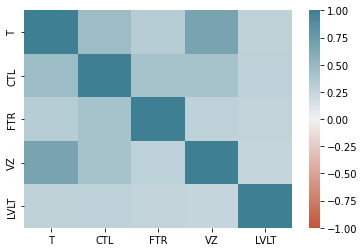

In [26]:
sns.heatmap(telecom_prices.corr(), vmin = -1, vmax = 1, 
           cmap = sns.diverging_palette(20, 220, as_cmap = True))

#### etf 들의 일간 수익 사이의 상관관계

를 구해볼 수도 있다.

In [27]:
etfs = sp500_px.loc[sp500_px.index > '2012-01-01',
                   sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

<AxesSubplot:>

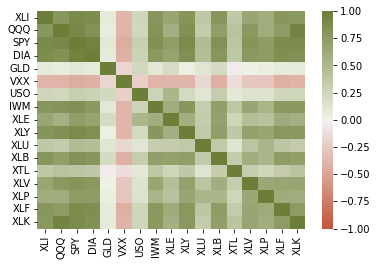

In [33]:
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
           cmap = sns.diverging_palette(20, 100, as_cmap = True))

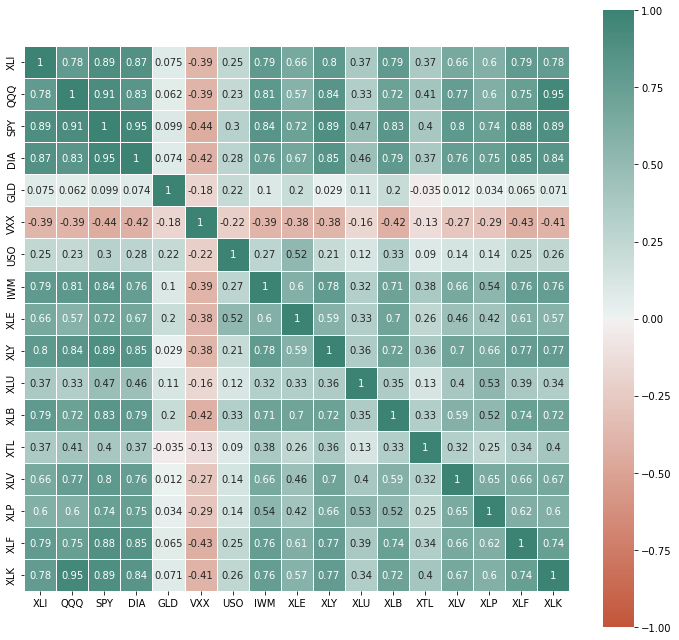

In [47]:
# 크기 조절하기

fig, ax = plt.subplots(figsize=(10, 9))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 170, as_cmap=True),
                 ax=ax, 
                 square = True, linewidths = 0.5, annot = True)             # 옵션 가지고 놀기: 그래프 정사각형하기, 선 그리기, 값 표시하기

plt.tight_layout()
plt.show()

---

## 산점도

두 변수 사이의 관계를 시각화하는 가장 기본적인 방법이다.

x, y 축에 각각의 변수를 위치시키고, 그래프의 각 점은 하나의 레코드를 의미한다.

특정 통신산업 회사 간의 일간 수익의 상관관계를 그림으로 타나내보자.

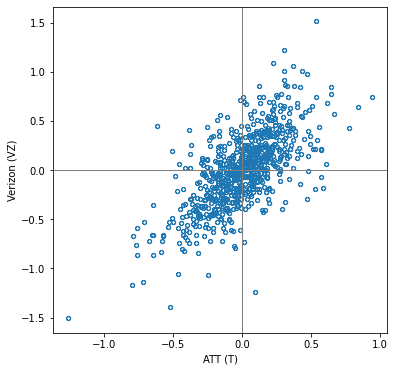

In [41]:
# 원형 동그라미로 AT&T와 버라이즌의 일간 수익 상관관계 그리기
scat_plot = telecom_prices.plot.scatter(x = 'T', y = 'VZ', figsize = (6, 6), marker = '$\u25EF$')

# 그래프 축 이름
scat_plot.set_xlabel('ATT (T)')
scat_plot.set_ylabel('Verizon (VZ)')

# 그래프 x = 0, y = 0 선 그리기
scat_plot.axhline(0, color = 'grey', lw = 1)
scat_plot.axvline(0, color = 'grey', lw = 1)

위를 해석한다면 두 회사의 수익 모두 0 주변에 몰려있긴 하지만 강한 양의 상관성을 띠고 있다. 

제 1 사분면, 3 사분면에 데이터가 더 많은 것을 보면 이는 거의 매일, 두 주식은 함께 오르거나 함께 떨어졌다는 의미이다. 

제 2 사분면, 4 사분면에 데이터는 서로 반대로 오르거나 떨어지는 경우로, 상대적으로 적다.

# 두 개 이상의 변수 탐색하기

평균이나 분산은 한 번에 한 변수를 다루는 일변량분석(univariate analysis)이다.

상관분석은 두 변수를 비교하는 이변량분석(bivariate analysis)이다.

이번에는 셋 이상의 변수를 비교하는 다변량분석(multivariate analysis)를 다루는 방법을 살펴본다.

#####  주요 용어 정리

> 


In [7]:
kc_tax.describe()

,TaxAssessedValue,SqFtTotLiving,ZipCode
count,4.975110e+05,498249.000000,4.679000e+05
mean,4.737959e+05,2057.651714,9.830935e+04
std,5.380832e+05,938.705293,1.440555e+05
min,1.000000e+03,0.000000,0.000000e+00
25%,2.690000e+05,1410.000000,9.803200e+04
50%,3.840000e+05,1900.000000,9.807000e+04
75%,5.490000e+05,2520.000000,9.811800e+04
max,1.235360e+08,48160.000000,9.815706e+07


In [8]:
kc_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498249 entries, 0 to 498248
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TaxAssessedValue  497511 non-null  float64
 1   SqFtTotLiving     498249 non-null  int64  
 2   ZipCode           467900 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 11.4 MB


In [9]:
kc_tax.isna().sum()

TaxAssessedValue      738
SqFtTotLiving           0
ZipCode             30349
dtype: int64

#### subset : 지나치게 크거나 작은, 지나치게 비싼 주택을 제거

TaxAssessedValue: The assessed value is a property's determined valuation to calculate the appropriate tax rates. 

SqFtTotLiving: Multiply all length and width measurements. Add all the measurements to obtain the total square footage of the home. 

각각 세금을 내기로 되어있는 가격, 주택의 면적, 주소코드로 이루어져있다.

분포를 보고자 함에 있어서 편의를 위해 일부 데이터를 제거한 데이터 셋을 만든다.

In [10]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000)
                    & (kc_tax.SqFtTotLiving > 100)
                    & (kc_tax.SqFtTotLiving < 3500)]

kc_tax0.shape

(432693, 3)

In [14]:
498249 - 432693

65556

## 육각형 구간 그림 (plot.hexbin)

점으로 표시하는 대신 기록값을 육각형 모양의 구간들로 나누고, 각 구간에 포함된 기록값의 개수에 따라 색을 표시한다.

도표의 형태를 보고 상관관계를 파악하기도 좋다.

킹 카운티 주택들의 과세 평가액과 크기 사이의 관계를 나타내도록 한다. 

```
 sharex : 모든 서브플롯이 같은 x축 눈금을 사용하도록한다는 의미이다. *(참조:https://sacko.tistory.com/34)*
```
### 킹 카운티 집들의 과세 평가액과 주택 크기 사이의 관계

Text(0, 0.5, 'Tax_assessed Value')

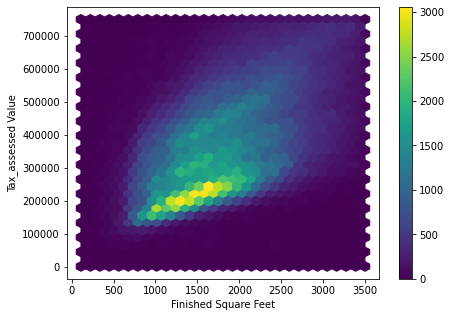

In [16]:
hexagonal_binning = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue', 
                                       gridsize = 30, sharex = False, figsize= (7, 5), 
                                       cmap="viridis") 

hexagonal_binning.set_xlabel('Finished Square Feet')
hexagonal_binning.set_ylabel('Tax_assessed Value')

그래프를 보면 집의 크기와 과세 평가 금액이 양의 상관관계를 갖는 것을 쉽게 파악할 수 있다.

또한 주요 그룹 부분(범례상 짙은-내가 그린 그림에서는 밝은색) 위쪽에 또 하나의 그룹이 있는 것을 볼 수 있다. 

이 부분들의 집들은 주요 그룹 부분과 크기는 같아도 더 높은 과세 평가액을 갖는다.

실제로 보면 크게 세 그룹이 되지 않을까 하는 생각.
 

## 등고선 (sns.kdeplot())

두 수치형 변수 사이의 관계를 시각하기 위해 산점도 위에 등고선을 사용하기도 한다.

등고선 위의 점들은 밀도가 같다. 일반적인 등고선을 보듯이 등고선 기준 높은 쪽으로 갈 수록 밀도는 높아진다. 

위의 육각형 도표에서 애매하게 그려진 부분들도 직접적으로 확인할 수 있다고 기대할 수 있을듯!

Text(0, 0.5, 'Tax_assessed Value')

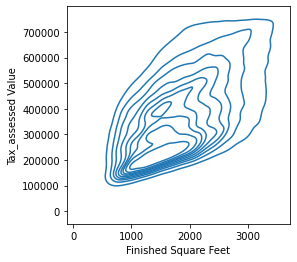

In [17]:
fig, ax = plt.subplots(figsize = (4, 4))

contour_plot = sns.kdeplot(data = kc_tax0, x = 'SqFtTotLiving', y = 'TaxAssessedValue', ax = ax)
contour_plot.set_xlabel('Finished Square Feet')
contour_plot.set_ylabel('Tax_assessed Value')

위 그래프 그리는데 5분 정도 걸렸다. 등고선을 그리는 코드는 매우 느릴 수 있음을 주의해야 한다. 

만약 scatterplot 위에 그리게 되어있었으면 엄청엄청더 오래걸렸을 듯.

---

두 수치형 변수의 관계를 나타내는 다른 도표로 히트맵이 있다.

히트맵 육각 구간, 등고 도표 모두 이차원 상의 밀도를 시각화 하는 데 사용된다.

지나가지말고 히트맵 한 번 그려보기

<AxesSubplot:>

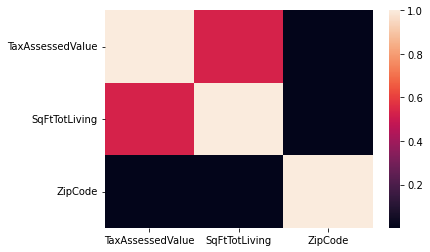

In [20]:
sns.heatmap(kc_tax0.corr())

# categorial variates 사이의 요약

분할표는 범주별 빈도수를 기록한 표로, 두 범주형 변수를 요약하는 데 효과적인 방법이다.



### lc_loan: Lending Club에서 제공하는 P2P방식의 대출 사업 대출 결과 데이터셋

개인대출 등급과 대출 결과를 나타내는 분할표이다.

등급은 A(상)~G(하)까지 있고, 

대출 결과는 Fully paid, current, late, charged off(대출 잔여금 회수 불능) 등의 범주로 표시되어 있다.



In [21]:
lc_loan = pd.read_csv(LC_LOANS_CSV)
lc_loan

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [24]:
lc_loan.describe()

,status,grade
count,450961,450961
unique,4,7
top,Current,B
freq,321185,132370


간단히 보면 현재 진행중 상태가 가장 많으며, B등급이 가장 많은 것으로 사료된다.

## contigency table (pivot_table과 loc 활용) ***

각 범주에 대한 빈도와 그 백분율을 볼 수 있는 분할표를 그려보도록 하자.

각 등급별 상황별에 대한 분할표이다.

횡으로 보면 대출 등급별 상황의 비율을 알 수 있다. 

원래 R로 그린 그림을 보면, 종으로 보면 상황별 등급의 비율을 알 수 있어야 하는데 왜 못하세요...?


In [25]:
crosstab = lc_loan.pivot_table(index = 'grade', columns = 'status',
                              aggfunc = lambda x: len(x), margins = True) # 횟수 정보를 얻기 위해 aggfunc을 사용. 열과 행의 합계를 추가한다

df = crosstab.loc['A':'G', : ].copy()                                     # 열 합계를 무시하고 피봇 테이블의 복사본을 만든다
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis = 0) # 행 합계로 행을 나눈다
df['All'] = df['All'] / sum(df['All'])                                    # 행 합계로 행을 나눈다.
perc_crosstab = df

In [40]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


#### 이러한 범주형 변수를 다룰 때는 사람이 보기 편하도록 각 범주에 이름을 붙여주는 것도 좋은 방법이라구.

전액 상황, 진행 중, 연체, 삭제 순서가 보기 편할 것이다.

각각 숫자 1 2 3 4 를 붙여줄 것이다.

In [43]:
lc_loan.replace(to_replace = 'Fully Paid', value = '1_Fully_Paid', inplace = True)
lc_loan.replace(to_replace = 'Current', value = '2_Current', inplace = True)
lc_loan.replace(to_replace = 'Late', value = '3_Late', inplace = True)
lc_loan.replace(to_replace = 'Charged Off', value = '4_Charged_Off', inplace = True)

In [44]:
lc_loan['status'].unique()

array(['1_Fully Paid', '4_ChargedOff', '2_Current', '3_Late'],
      dtype=object)

In [49]:
crosstab = lc_loan.pivot_table(index = 'grade', columns = 'status',
                              aggfunc = lambda x: len(x), margins = True) # 횟수 정보를 얻기 위해 aggfunc을 사용. 열과 행의 합계를 추가한다

df = crosstab.loc['A':'G', : ].copy()                                     # 열 합계를 무시하고 피봇 테이블의 복사본을 만든다
df.loc[:, '1_Fully_Paid':'4_Charged_Off'] = df.loc[:, '1_Fully_Paid':'4_Charged_Off'].div(df['All'], axis = 0) # 행 합계로 행을 나눈다
df['All'] = df['All'] / sum(df['All'])                                    # 행 합계로 행을 나눈다.
perc_crosstab = df

In [50]:
perc_crosstab

status,1_Fully Paid,2_Current,3_Late,4_ChargedOff,All
grade,,,,,
A,20408,0.690454,0.006470,0.021548,0.160746
B,31160,0.709013,0.015532,0.040054,0.293529
C,23147,0.735702,0.022974,0.049828,0.268039
D,13681,0.717328,0.031073,0.067410,0.164708
E,5949,0.707936,0.039478,0.081657,0.077177
F,2328,0.654371,0.046962,0.118258,0.028614
G,643,0.614008,0.061401,0.126196,0.007187


무슨 문제인지 모르겠는데 이름만 바꾸어줬을 뿐인데 첫 열의 데이터들이 전부 0. 이 생략되어있다...

# numeric variate and categorial variate 

박스플롯은 범주형 변수에 따라 분류된 수치형 변수의 분포를 시각화하여 비교하는 간단한 방법이다.


### AIRLINE_STATS_CSV: 항공사 별 비행 지연 정도 data

항공사별 비행 지연 정도를 비교하려고 한다. 

데이터셋을 살펴본 결과 지연 정도라고 하는데 지연된 퍼센트를 가르키는 것을 보아 한 레코드 자체는 일일 혹은 주간 등의 기록일 것으로 추정된다.

각 항공사 별로 레코드 개수는 이렇다.

```
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
```

한 달동안 비행사별로 비행 지연 비율을 보여준다고 하는데 무슨 비율인지 명확하지 않아서 조금 그런 예제인것 같다.

In [52]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [53]:
airline_stats.shape

(33468, 4)

In [54]:
airline_stats.isna().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

In [58]:
airline_stats.pivot_table(index = 'airline', values = 'pct_weather_delay' )

,pct_weather_delay
airline,
Alaska,0.513497
American,1.122920
Delta,0.680765
Jet Blue,0.465327
Southwest,0.512611
United,0.680697


In [61]:
airline_stats['airline'].value_counts()

Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: airline, dtype: int64

## boxplot


### 항공사별 한 달간 항공기와 관련한 비행 지연 비율

Text(0.5, 0.98, '')

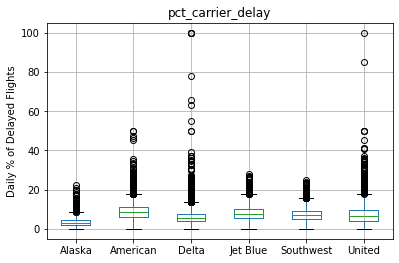

In [62]:
air_boxplot = airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay')

air_boxplot.set_xlabel('')
air_boxplot.set_ylabel('Daily % of Delayed Flights')

plt.suptitle('')

Text(0.5, 0.98, 'airline')

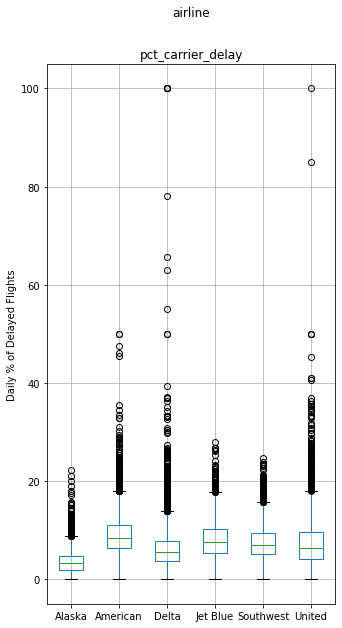

In [68]:
# 너무 작으니 사이즈를 세로로 좀더 키워보고자 한다.

fig, ax = plt.subplots(figsize = (5, 10))

air_boxplot = airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay', ax =ax)

air_boxplot.set_xlabel('')
air_boxplot.set_ylabel('Daily % of Delayed Flights')

plt.suptitle('airline')

Alaska 항공이 지연이 제일 적었던 반면 American 항공이 제일 지연이 많았음을 볼 수 있고

American 항공의 1사분위수가 Alaska 항공의 3사분위수보다 높은 것을 볼 수 있다.

### 항공사별 한 달간 날씨 관련한 비행 지연 비율

Text(0.5, 0.98, '')

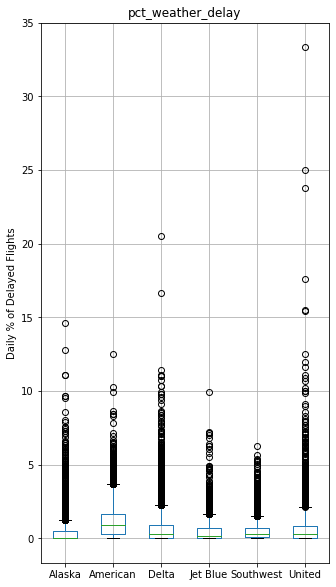

In [71]:
fig, ax = plt.subplots(figsize = (5, 10))

air_boxplot = airline_stats.boxplot(by = 'airline', column = 'pct_weather_delay', ax = ax)

air_boxplot.set_xlabel('')
air_boxplot.set_ylabel('Daily % of Delayed Flights')

plt.suptitle('')

유나이티드 항공은 아예 outlier 수준의 이상치가 다른 항공보다 더 많고 큰 것을 보아 날씨가 안좋을 날씨를 예측을 못하고 항공편을 짰는지도 모른다는 생각도 드는 재밌는 그래프.

## violin plot 

박스플롯을 보완한 형태이다. y축을 따라 밀도추정 결과를 동시에 시각화한다. 밀도 분포모양을 좌우 대칭으로 놓고 보면 바이올린을 닮은 모양이다.

**장점은 박스플롯에서 보이지 않는 데이터의 분포를 함께 볼 수 있다는 점이다.**

또한 박스플롯은 데이터의 특잇값들을 좀 더 명확히 보여준다.

### 항공사별 한 달간 항공기와 관련한 비행 지연 비율

Text(0.5, 0.98, '')

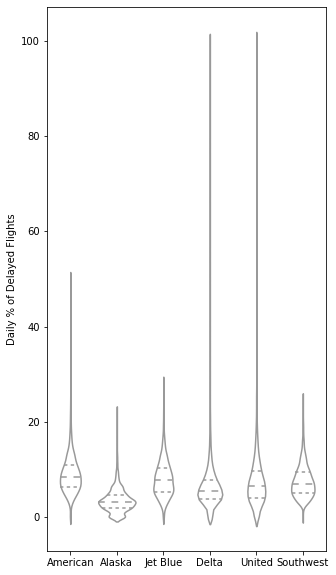

In [75]:
fig, ax = plt.subplots(figsize = (5, 10))


air_violinplot = sns.violinplot(x = airline_stats.airline, y = airline_stats.pct_carrier_delay, ax = ax,
                               inner = 'quartile', color = 'white')

air_violinplot.set_xlabel('')
air_violinplot.set_ylabel('Daily % of Delayed Flights')

plt.suptitle('')

알래스카항공과 델타 항공이 거의 0 근에 모여있는 편인 것을 볼 수 있다. 

잠시 옵션을 보면
```
inner : {"box", "quartile", "point", "stick", None}, optional
    Representation of the datapoints in the violin interior. If ``box``,
    draw a miniature boxplot. If ``quartiles``, draw the quartiles of the
    distribution.  If ``point`` or ``stick``, show each underlying
    datapoint. Using ``None`` will draw unadorned violins.
```

이렇게 나누어져있다. 다른 옵션으로도 그려보자.

Text(0.5, 0.98, '')

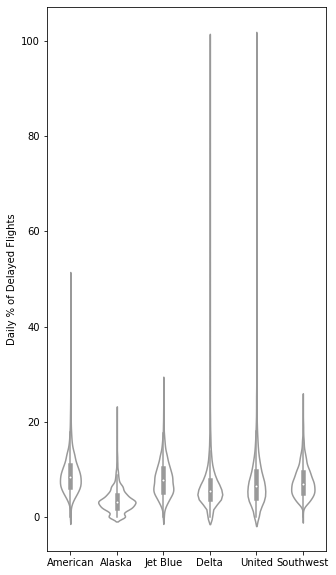

In [76]:
fig, ax = plt.subplots(figsize = (5, 10))


air_violinplot = sns.violinplot(x = airline_stats.airline, y = airline_stats.pct_carrier_delay, ax = ax,
                               inner = 'box', color = 'white')

air_violinplot.set_xlabel('')
air_violinplot.set_ylabel('Daily % of Delayed Flights')

plt.suptitle('')

Text(0.5, 0.98, '')

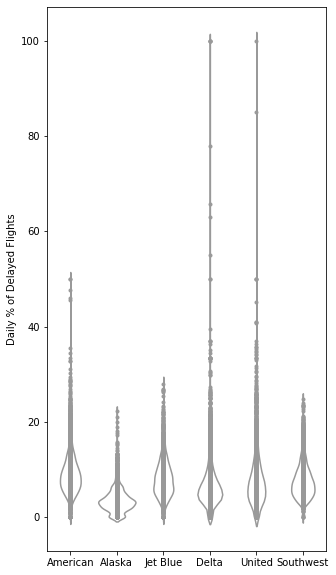

In [77]:
fig, ax = plt.subplots(figsize = (5, 10))


air_violinplot = sns.violinplot(x = airline_stats.airline, y = airline_stats.pct_carrier_delay, ax = ax,
                               inner = 'point', color = 'white')

air_violinplot.set_xlabel('')
air_violinplot.set_ylabel('Daily % of Delayed Flights')

plt.suptitle('')

Text(0.5, 0.98, '')

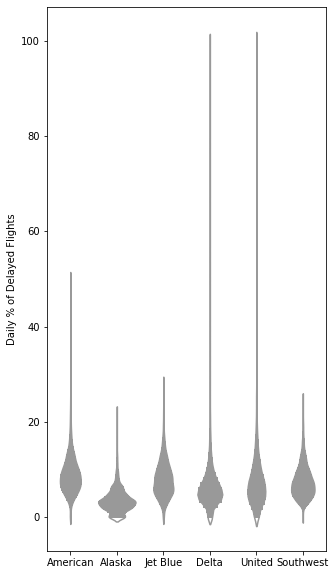

In [78]:
fig, ax = plt.subplots(figsize = (5, 10))


air_violinplot = sns.violinplot(x = airline_stats.airline, y = airline_stats.pct_carrier_delay, ax = ax,
                               inner = 'stick', color = 'white')

air_violinplot.set_xlabel('')
air_violinplot.set_ylabel('Daily % of Delayed Flights')

plt.suptitle('')

inner = 'stick' 옵션으로 바꾸자 갑자기 시간이 오래걸렸는데 결과는 위와 같다. 

## multivariate analysis visualization

조건화(conditioning)라는 개념을 통해 투 변수 비교용 도표를 더 여러 변수를 비교하는 용도로 확장하여 활용할 수 있다.

### 주택크기별 가격 데이터의 지역 간 비교

주택 크기 당 더 높은 과세 평가금액을 보였던 주택들을 알 수 있는데, 지리적 요인으로 zip code를 활용하여 우편번호별로 데이터를 묶어서 도식화 해보도록한다.

맷플랏립으로 하면 코드가 길어질 수 있는데 씨본을 활용하면 된다.

In [79]:
# 4 개의 zipcode로 일부 주택들을 가져옴

zip_codes = [98188, 98105, 98108, 98126]

kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), : ]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


In [80]:
# 육각도표를 그리는 함수를 만들어서 격자 형태로 넣을 것이다.

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap = True)
    plt.hexbin(x, y, gridsize = 25, cmap = cmap, **kwargs)

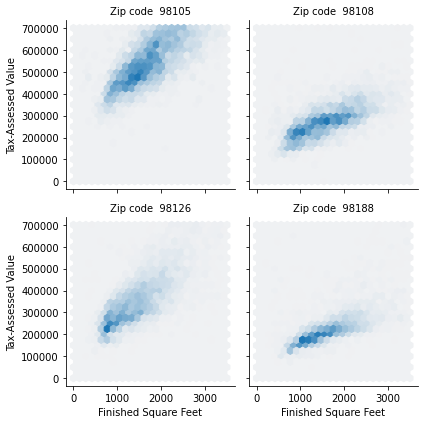

In [81]:
# sns.FacetGrid() 를 활용하여 grid를 만들어서 넣기


# 조건 변수를 지정하려면 col과 row 옵션에 넣어서 사용하면 된다. 단일 조건 변수의 경우col_wrap과 함께 col을 써서, 패싯 그래프를 여러 행으로 wrapping하면 된다.
g = sns.FacetGrid(kc_tax_zip, col = 'ZipCode', col_wrap = 2)  

# map 메소드는 다른 우편번호들에 대한 원래 데이터 집합의 서브셋에 대해 hexbin 에 넣어 데려온다. extent는 x와 y축의 한계를 정한다
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent = [0, 3500, 0, 700000])

# lable과 각 서브셋의 이름을 지어준다.
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name: .0f}')